<a href="https://colab.research.google.com/github/kalpeshkrish/K/blob/main/Copy_of_Copy_of_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Uploading the csv
from google.colab import files
data_to_load = files.upload()

Saving titanic.csv to titanic.csv


Now let's quickly create a dataframe and use it to create a machine learning model for Decision Tree.

In [2]:
import pandas as pd

#Column Name
col_names = ['passID', 'Pclass', 'gender', 'age', 'SS', 'Parch','survived']

df = pd.read_csv("titanic.csv", names=col_names).iloc[1:]

print(df.head())

  passID Pclass gender   age SS Parch survived
1      1      3      1  34.5  1     0        0
2      2      1      0    47  1     0        1
3      3      3      0    62  0     0        1
4      4      1      0    27  1     0        1
5      5      3      1    22  0     0        0


### Select the features

In [3]:
features = ['passID', 'Pclass', 'gender', 'age', 'SS']
X = df[features]
y = df.survived

### Splitting the data into training and testing and fitting it in the model

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#splitting data in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Initialising the Decision Tree Model
clf = DecisionTreeClassifier()

#Fitting the data into the model
clf = clf.fit(X_train,y_train)

#Calculating the accuracy of the model
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6902985074626866


# Visualising the Decision Tree

Now that we have have built a decision tree model, that can predict with an accuracy score of 0.67 if a person has diabetes or not based on their data, is there a way we can visualise it?

\
There sure is. Let's see how!

\
## Fun Fact

To create a visualisation for the Decision Tree Classifier we build above, we will use the `export_graphviz` module of python to first convert the data into text that we can read and understand, and then we'll use the `pydotplus` module to convert this text into an image.

In [5]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image
import pydotplus

dot_data = StringIO() #Where we will store the data from our decision tree classifier as text.

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])

print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<gender &le; 0.5<br/>gini = 0.463<br/>samples = 623<br/>value = [396, 227]<br/>class = 0>, fillcolor="#f4c9aa"] ;
1 [label=<Pclass &le; 2.5<br/>gini = 0.387<br/>samples = 217<br/>value = [57, 160]<br/>class = 1>, fillcolor="#80c0ee"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<age &le; 0.5<br/>gini = 0.097<br/>samples = 117<br/>value = [6, 111]<br/>class = 1>, fillcolor="#44a2e6"] ;
1 -> 2 ;
3 [label=<passID &le; 176.0<br/>gini = 0.391<br/>samples = 15<br/>value = [4, 11]<br/>class = 1>, fillcolor="#81c1ee"] ;
2 -> 3 ;
4 [label=<gini = 0.0<br/>samples = 4<br/>value = [0, 4]<br/>class = 1>, fillcolor="#399de5"] ;
3 -> 4 ;
5 [label=<passID &le; 362.5<br/>gini = 0.463<br/>samples = 11<br/>value = [4, 7]<br/>class = 1>, fillcolor="#aad5f4"] ;
3 -> 5 ;
6 [label=<passID &le; 294.5<br/>gini = 0.49<br/>samples = 7<br/>value = [4, 3

Above, we can see how our Decision Tree Classifier got converted into something that we can read and understand. Now, using the `pydotplus`, we will convert this into an image. Let's see how would that look like -

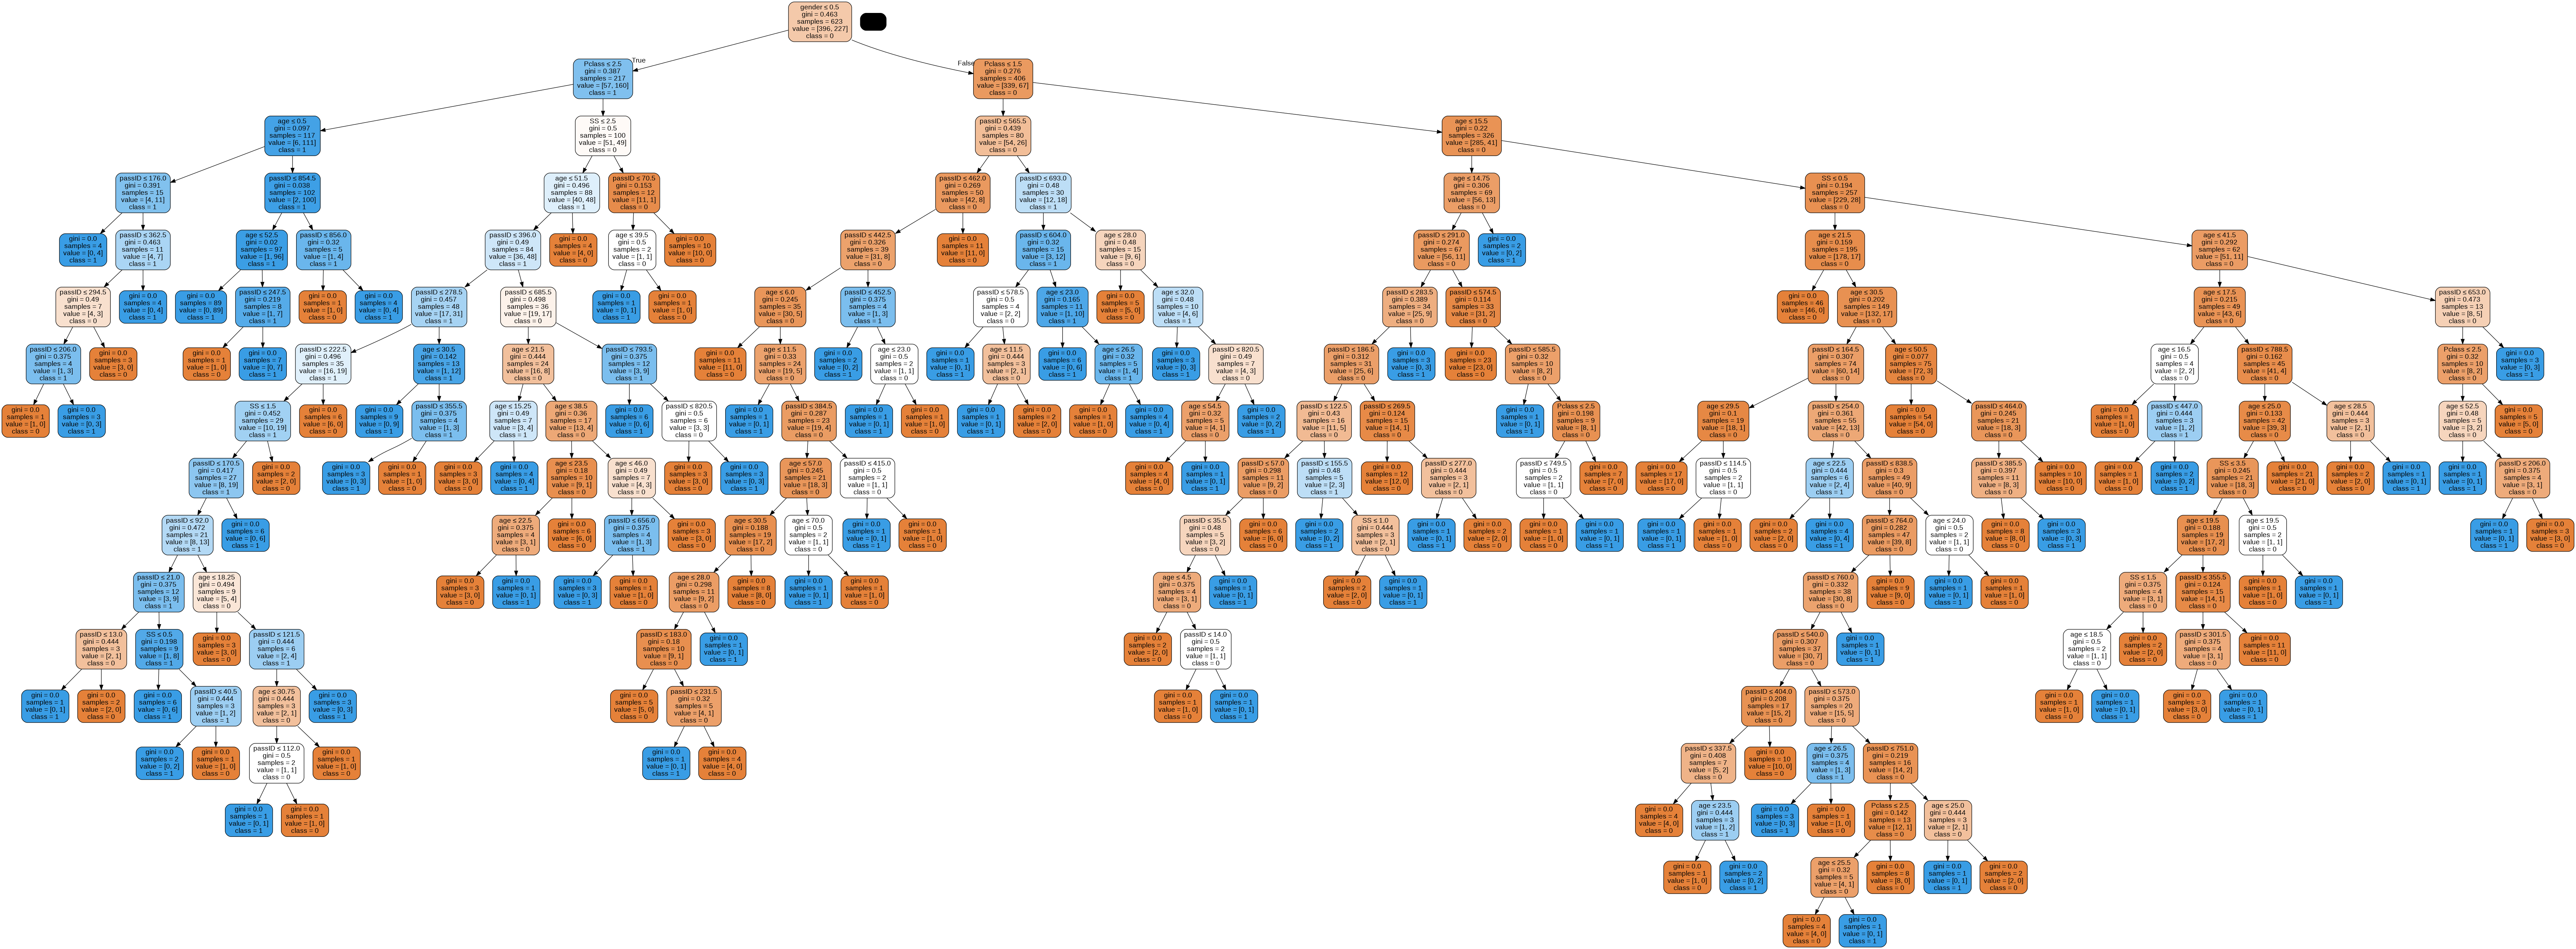

In [6]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

In the chart above, we can hardly make out anything, but each of the **internal node** has a decision rule using which, it splits the data.

\
Can we make this decision tree such that we can understand it? Yes we can!

\
We can do that by doing some `pruning`. If we look at the charts above, we can see that our decision tree goes much deeper from our root node. We can limit the max-depth of a Decision Tree Model as per our convenience. Let's work it out again.

In [7]:
clf = DecisionTreeClassifier(max_depth=3)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.746268656716418


Here, we can see that by reducing the maximum depth we want our decision tree to go, we have also achieved a higher accuracy. Let's visualise this again!

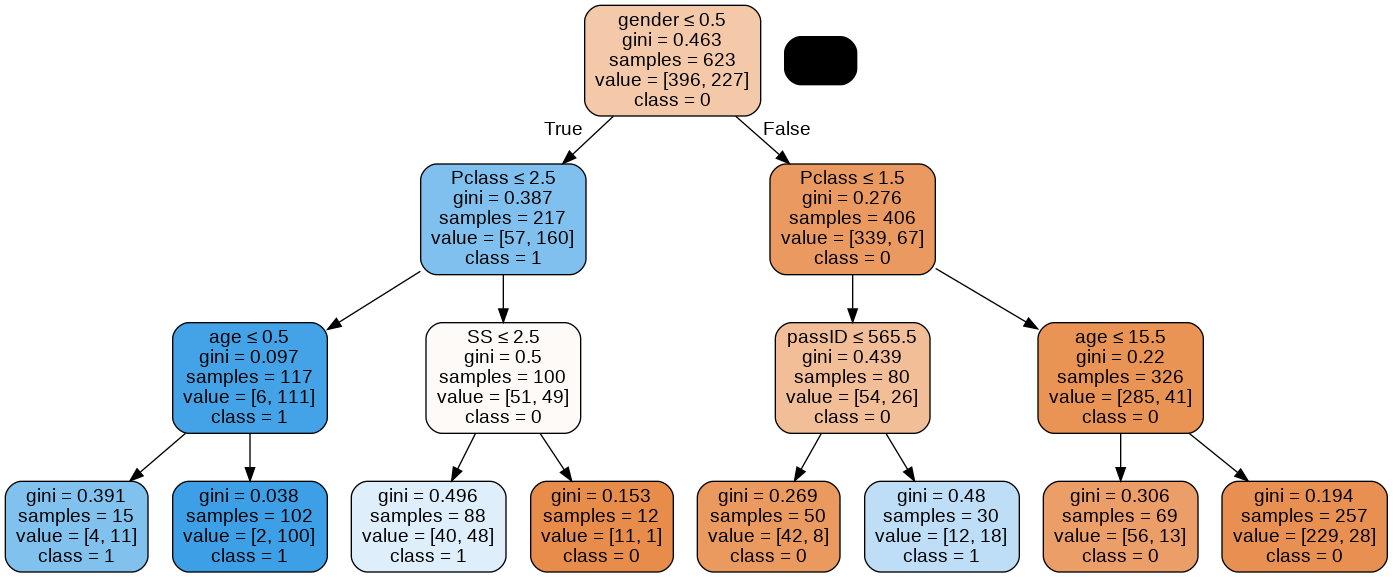

In [8]:
dot_data = StringIO() #Where we will store the data from our decision tree classifier as text.

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

Here, we can see that the tree is much more readable and understandable. We set the max-depth to 3, so it only goes 3 layers down from the root node.

\
This pruned model is less complex, explainable, easy to understand and more accurate than the previous decision tree plot.

\
# Conclusion

By looking at this chart, we can say with almost 75% accuracy that a person who's


*   **Glucose** is greater than 129.5 and,
*   **BMI** is greater than 27.85

Is more prone to be a Diabetes Patient.